In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow.keras import datasets,layers,models

In [107]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [65]:
x_train.shape

(50000, 32, 32, 3)

In [66]:
x_train=x_train/255
x_test=x_test/255

In [67]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [68]:
classes=["aeroplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [69]:
y_train=y_train.reshape(-1)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [70]:
def plot_img(x,y,index):
    plt.figure(figsize=(8,3))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

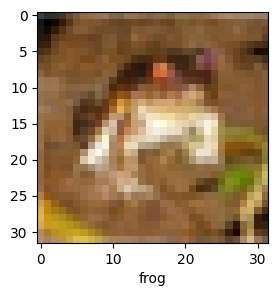

In [71]:
plot_img(x_train,y_train,0)

In [72]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid')
])
ann.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
ann.fit(x_train,y_train,epochs=10)

Epoch 1/10
 239/1563 [===>..........................] - ETA: 1:40 - loss: 2.0320 - accuracy: 0.2643

KeyboardInterrupt: 

In [108]:
ann.evaluate(x_test,y_test)

313/313 [==============================] - 5s 16ms/step - loss: 132.1419 - accuracy: 0.3348


[132.14193725585938, 0.33480000495910645]

In [74]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=ann.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classificarion report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 15ms/step
classificarion report: 
               precision    recall  f1-score   support

           0       0.45      0.39      0.42      1000
           1       0.52      0.23      0.32      1000
           2       0.29      0.20      0.24      1000
           3       0.20      0.52      0.29      1000
           4       0.48      0.13      0.20      1000
           5       0.43      0.17      0.24      1000
           6       0.30      0.48      0.37      1000
           7       0.46      0.20      0.28      1000
           8       0.37      0.62      0.47      1000
           9       0.41      0.44      0.43      1000

    accuracy                           0.34     10000
   macro avg       0.39      0.34      0.33     10000
weighted avg       0.39      0.34      0.33     10000



In [75]:
classes[np.argmax(y_pred[0])]

'cat'

In [111]:
cnn=models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [112]:
cnn.fit(x_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 47s 29ms/step - loss: 1.9773 - accuracy: 0.3925
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.3248 - accuracy: 0.5302
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 1.1721 - accuracy: 0.5900
Epoch 4/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0663 - accuracy: 0.6290
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 0.9733 - accuracy: 0.6619
Epoch 6/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.9090 - accuracy: 0.6864
Epoch 7/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.8553 - accuracy: 0.7057
Epoch 8/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.8095 - accuracy: 0.7207
Epoch 9/10
1563/1563 [==============================] - 47s 30ms/step - loss: 0.7595 - accuracy: 0.7385
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [113]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 7ms/step - loss: 1.1250 - accuracy: 0.6483


[1.1249674558639526, 0.6482999920845032]

In [82]:
def plot_sample(x,y,index):
    plt.figure(figsize=(5,3))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

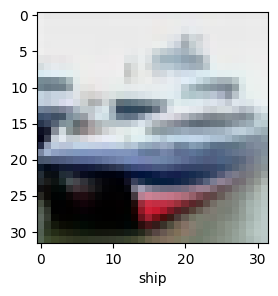

In [116]:
y_test=y_test.reshape(-1)
plot_sample(x_test,y_test,1)

In [117]:
classes

['aeroplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [118]:
y_test[0:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [119]:
y_classes =[np.argmax(ele) for ele in y_pred]

In [120]:
def y_prediction(index,x,y):
    plt.figure(figsize=(5,3))
    plt.imshow(x[index])
    plt.ylabel('original: '+classes[y[index]])
    plt.xlabel(classes[y_classes[index]])


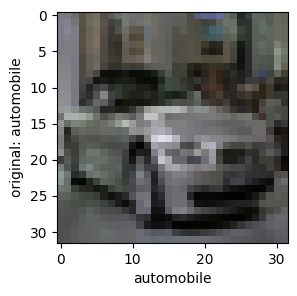

In [122]:
y_prediction(990,x_test,y_test)

In [114]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 1.1250 - accuracy: 0.6483


[1.1249674558639526, 0.6482999920845032]